In [136]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [137]:
# Importing training data

train = pd.read_csv("E:/Data Science/Datasets/House Prices Advanced Regression Techniques/train.csv", index_col = 'Id')

train.dropna(how = 'all')
train.T

Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,90,20,180,20,20,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84,85,75,NaN,51,50,...,60,78,35,90,62,62,85,66,68,75
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,...,9000,9262,3675,17217,7500,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,2,5,9,2,12,10,8,11,4,1,...,9,5,5,7,10,8,2,5,4,6
YrSold,2008,2007,2008,2006,2008,2009,2007,2009,2008,2008,...,2009,2009,2006,2006,2009,2007,2010,2010,2010,2008
SaleType,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,...,WD,New,WD,WD,WD,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal,Normal,Normal,Normal,Abnorml,Normal,...,Normal,Partial,Normal,Abnorml,Normal,Normal,Normal,Normal,Normal,Normal


In [138]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

from xgboost import XGBRegressor

In [139]:
int_cols = list(train.select_dtypes(include = np.number))
int_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [140]:
train = train.fillna(method='ffill')
train.isnull().any()

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 80, dtype: bool

In [141]:
x = train[int_cols].drop('SalePrice', axis = 1)
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12)

In [142]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

[12:22:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [143]:
pred = xgb.predict(X_test)
pred

array([231538.84 , 219871.89 , 189350.1  , 128452.33 , 172180.16 ,
       279593.5  , 141668.3  , 197733.2  , 228559.83 , 258025.73 ,
       420473.6  , 218745.8  , 163059.08 , 233251.39 , 249710.39 ,
       239246.36 , 270561.66 ,  94731.35 , 137970.92 , 101425.9  ,
       120480.86 , 300108.28 , 132713.61 ,  89512.44 , 113199.64 ,
       206341.66 , 226578.9  , 164990.75 , 147043.89 , 187670.12 ,
       115644.44 , 155501.22 , 196177.28 , 122234.95 , 119287.23 ,
        86424.89 , 213233.39 , 199688.02 , 168958.28 , 137920.78 ,
       193037.06 , 169778.64 , 171207.14 , 136146.28 , 305563.12 ,
       166995.11 ,  69115.59 , 112710.57 , 217765.75 , 224578.02 ,
       140526.17 , 248241.42 ,  90074.664, 190127.03 , 660780.4  ,
       123161.07 , 136251.88 , 436091.5  , 197492.47 , 317593.38 ,
       325411.94 , 143206.12 , 210282.64 , 191930.83 , 214087.55 ,
       275340.53 , 115656.56 , 297710.84 , 193064.45 , 164356.58 ,
       110764.29 , 296219.03 , 118636.58 , 193210.28 , 145018.

In [144]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

pred1 = model.predict(X_test)
pred1

array([230956.16236036, 252794.17195669, 177305.5576731 , 119162.97927586,
       190058.14893784, 237301.85127014, 133063.1267002 , 212781.13235753,
       227376.57363092, 253558.52026322, 423204.76664921, 223074.46243904,
       173752.46195193, 258404.36282734, 236436.88972552, 264762.20443073,
       279819.57966134,  76304.14206364, 169217.29569758, 126266.69329874,
       125584.22007019, 306897.82171436, 125702.30671931,  71004.0138439 ,
       125400.99522084, 219691.51285103, 219921.56945171, 179504.37456693,
       138724.20332072, 205927.17324109,  93755.60443864, 155405.41498654,
       190207.35764743,  80132.39717496, 108428.99401733,  54114.54405491,
       237924.43482586, 205138.79637643, 174465.94282548, 139208.62867193,
       187695.23449605, 203900.01000721, 181134.86257537, 123854.98592428,
       307153.63130764, 183789.44761555,  10743.70333534, 104842.42911487,
       233743.95718173, 227770.67123708, 142867.23138518, 249826.15411131,
        46933.39473435, 1

In [172]:
coef = pd.Series(model.coef_)
columns = pd.Series(x.columns)

values_df = pd.concat([columns, coef], axis = 1, keys = ['Columns','Coefficients'])
values_df

,Columns,Coefficients
0,MSSubClass,-124.951152
1,LotFrontage,91.424355
2,LotArea,0.475728
3,OverallQual,16071.045947
4,OverallCond,5447.968332
5,YearBuilt,305.591949
6,YearRemodAdd,132.521252
7,MasVnrArea,22.146001
8,BsmtFinSF1,20.925053
9,BsmtFinSF2,-1.842002


In [174]:
model.intercept_

294578.74516076734

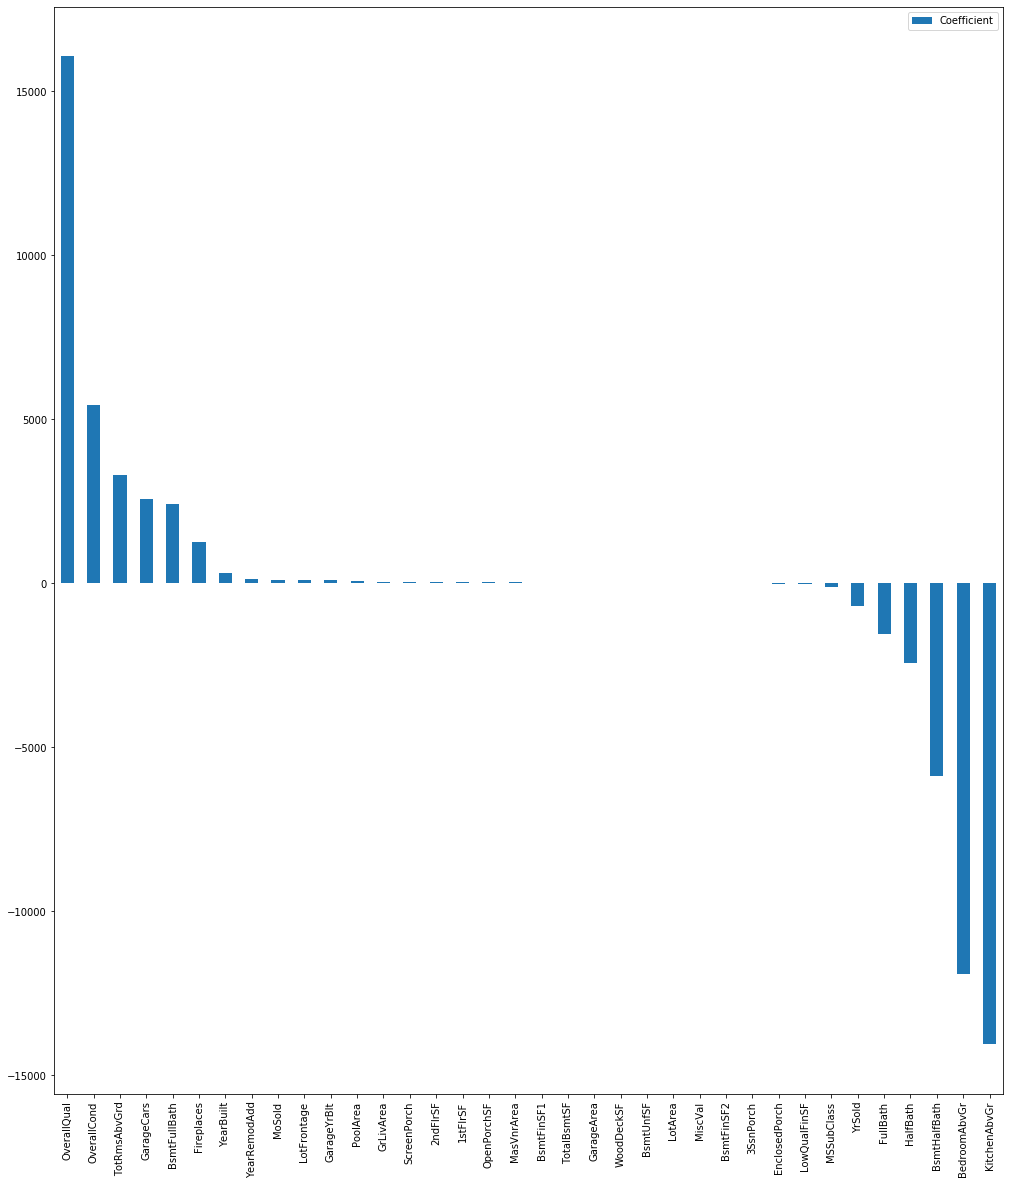

In [162]:
coeff_df = coeff_df.sort_values('Coefficient', ascending = False)
coeff_df.plot(kind = 'bar', figsize = (17,20))

In [163]:
features = pd.Series(xgb.feature_importances_)
features

0     0.002167
1     0.001464
2     0.009666
3     0.400603
4     0.006637
5     0.011368
6     0.018428
7     0.003964
8     0.022379
9     0.001654
10    0.001998
11    0.043628
12    0.045919
13    0.027281
14    0.001121
15    0.047788
16    0.010828
17    0.000000
18    0.091312
19    0.007235
20    0.007412
21    0.010727
22    0.011230
23    0.040821
24    0.004165
25    0.134295
26    0.007674
27    0.002804
28    0.010433
29    0.000000
30    0.002348
31    0.004058
32    0.005546
33    0.000000
34    0.001652
35    0.001397
dtype: float32

In [147]:
cols_series = pd.Series(int_cols)
int_df = pd.concat([cols_series, f], axis = 1, keys = ['Features', 'Feature Importance'])
int_df = int_df.sort_values(by = 'Feature Importance', ascending = False)
int_df

,Features,Feature Importance
3,OverallQual,0.400603
25,GarageCars,0.134295
18,FullBath,0.091312
15,GrLivArea,0.047788
12,1stFlrSF,0.045919
11,TotalBsmtSF,0.043628
23,Fireplaces,0.040821
13,2ndFlrSF,0.027281
8,BsmtFinSF1,0.022379
6,YearRemodAdd,0.018428


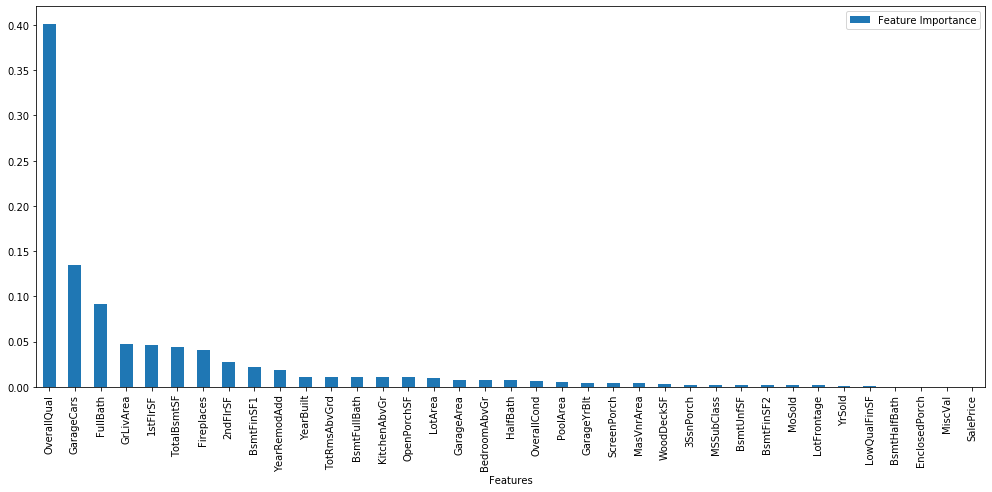

In [148]:
int_df.plot(kind = 'bar', x = 'Features', y = 'Feature Importance', figsize = (17,7))

In [149]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

score = r2_score(y_test,pred)
mae = mean_absolute_error(y_test,pred)
mse = np.sqrt(mean_squared_error(y_test,pred))

print("R2 Score :: ", score)
print("MAE Score :: ", mae)
print("MSE Score :: ", mse)


R2 Score ::  0.7316201710897847
MAE Score ::  18950.89551583904
MSE Score ::  42647.311674241704


In [150]:
# Importing training data

train = pd.read_csv("E:/Data Science/Datasets/diabetes.csv")

train.dropna(how = 'all')
train.T

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
Pregnancies,6.000,1.000,8.000,1.000,0.000,5.000,3.000,10.000,2.000,8.000,...,1.000,6.000,2.000,9.000,9.000,10.000,2.00,5.000,1.000,1.000
Glucose,148.000,85.000,183.000,89.000,137.000,116.000,78.000,115.000,197.000,125.000,...,106.000,190.000,88.000,170.000,89.000,101.000,122.00,121.000,126.000,93.000
BloodPressure,72.000,66.000,64.000,66.000,40.000,74.000,50.000,0.000,70.000,96.000,...,76.000,92.000,58.000,74.000,62.000,76.000,70.00,72.000,60.000,70.000
SkinThickness,35.000,29.000,0.000,23.000,35.000,0.000,32.000,0.000,45.000,0.000,...,0.000,0.000,26.000,31.000,0.000,48.000,27.00,23.000,0.000,31.000
Insulin,0.000,0.000,0.000,94.000,168.000,0.000,88.000,0.000,543.000,0.000,...,0.000,0.000,16.000,0.000,0.000,180.000,0.00,112.000,0.000,0.000
BMI,33.600,26.600,23.300,28.100,43.100,25.600,31.000,35.300,30.500,0.000,...,37.500,35.500,28.400,44.000,22.500,32.900,36.80,26.200,30.100,30.400
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288,0.201,0.248,0.134,0.158,0.232,...,0.197,0.278,0.766,0.403,0.142,0.171,0.34,0.245,0.349,0.315
Age,50.000,31.000,32.000,21.000,33.000,30.000,26.000,29.000,53.000,54.000,...,26.000,66.000,22.000,43.000,33.000,63.000,27.00,30.000,47.000,23.000
Outcome,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,...,0.000,1.000,0.000,1.000,0.000,0.000,0.00,0.000,1.000,0.000


In [151]:
train_object_df = list(train.select_dtypes(include = np.number).columns)
train_object_df

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [152]:
a = train.drop('Outcome', axis = 1)
b = train['Outcome']

X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.25, random_state=12)

In [153]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()

model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [181]:
features1 = (model2.feature_importances_)
features1

array([0.06066082, 0.33290802, 0.06033164, 0.05945998, 0.06913721,
       0.15652572, 0.1370421 , 0.12393451])

In [185]:
dt_df = pd.DataFrame(features1, index = a.columns, columns = ['feature_importances'])
dt_df

,feature_importances
Pregnancies,0.060661
Glucose,0.332908
BloodPressure,0.060332
SkinThickness,0.059460
Insulin,0.069137
BMI,0.156526
DiabetesPedigreeFunction,0.137042
Age,0.123935


---
---

# Label Encoding ::

This approach is very simple and it involves converting each value in a column to a
number. But depending upon the
data values and type of data, label encoding
induces a new problem since it uses
number sequencing. The problem using the
number is that they introduce
relation/comparison between them.
Apparently, there is no relation between
various bridge type, but when looking at
the number, one might think that ‘Cable’
bridge type has higher precedence over
‘Arch’ bridge type. The algorithm might
misunderstand that data has some kind of
hierarchy/order 0 < 1 < 2 … < 6 and might give 6X more weight to ‘Cable’ in calculation
then than ‘Arch’ bridge type.

In [177]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder 

#creating initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','TiedArch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns= ['Bridge_Types'])

# creating instance of label encoder

labelencoder = LabelEncoder() 

#Assigning numerical values and storing in another column

bridge_df['Bridge_Types_Cat'] =labelencoder.fit_transform(bridge_df['Bridge_Types'])

bridge_df

,Bridge_Types,Bridge_Types_Cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,TiedArch,5
5,Suspension,4
6,Cable,2


---
---
# One-Hot Encoding in Python ::

Though label encoding is straight but it has the disadvantage that the numeric values
can be misinterpreted by algorithms as having some sort of hierarchy/order in them.
This ordering issue is addressed in another common alternative approach called ‘One-
Hot Encoding’. In this strategy, each category value is converted into a new column and
assigned a 1 or 0 (notation for true/false) value to the column. Let’s consider the
previous example of bridge type and safety levels with one-hot encoding.

In [178]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder   

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')      

# passing bridge-types-cat column (label encoded values of bridge_types)

enc_df = pd.DataFrame(enc.fit_transform(bridge_df[['Bridge_Types_Cat']]).toarray())

# merge with main df bridge_df on key values

bridge_df = bridge_df.join(enc_df)
bridge_df

,Bridge_Types,Bridge_Types_Cat,0,1,2,3,4,5,6
0,Arch,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Beam,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Truss,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Cantilever,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,TiedArch,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,Suspension,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,Cable,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Using dummies values approach:
    
This approach is more flexible because it allows encoding as many category columns as
you would like and choose how to label the columns using a prefix. Proper naming will
make the rest of the analysis just a little bit easier.

In [179]:


import pandas as pd
import numpy as np

# creating initial dataframe

bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])

# generate binary values using get_dummies

dum_df = pd.get_dummies(bridge_df, columns=["Bridge_Types"], prefix=["Type_is"] )

# merge with main df bridge_df on key values

bridge_df = bridge_df.join(dum_df)
bridge_df

,Bridge_Types,Type_is_Arch,Type_is_Beam,Type_is_Cable,Type_is_Cantilever,Type_is_Suspension,Type_is_Tied Arch,Type_is_Truss
0,Arch,1,0,0,0,0,0,0
1,Beam,0,1,0,0,0,0,0
2,Truss,0,0,0,0,0,0,1
3,Cantilever,0,0,0,1,0,0,0
4,Tied Arch,0,0,0,0,0,1,0
5,Suspension,0,0,0,0,1,0,0
6,Cable,0,0,1,0,0,0,0


---
---
# Feature Importance by example of a Random Forest


### Default Scikit-learn’s feature importances

Let’s start with decision trees to build some intuition. In decision trees, every node is a
condition of how to split values in a single feature, so that similar values of the
dependent variable end up in the same set after the split. The condition is based on
impurity, which in case of classification problems is Gini impurity/information gain
(entropy), while for regression trees its variance. So when training a tree we can compute
how much each feature contributes to decreasing the weighted impurity.


feature_importances_ in Scikit-Learn is based on that logic, but in the case of Random
Forest, we are talking about averaging the decrease in impurity over trees.

Pros:
- fast calculation
- easy to retrieve — one command


Cons:
- biased approach, as it has a tendency to inflate the importance of continuous
- features or high-cardinality categorical variables

# String Formatting ::

In [1]:
print(" His name is %(name)s. His height is %(height)d cms. His score is %(score)2.2f"%{'height' : 76.45654,
                                                                                       'name' : 'Rio',
                                                                                       'score' : 89.98784})

 His name is Rio. His height is 76 cms. His score is 89.99


In [4]:
print("{1}, {0}, {2}, {3}, {4} values are wrong.".format('One', ' zero', 'two', 'three', 'four'))

 zero, One, two, three, four values are wrong.


In [6]:
import numpy as np

list1 = np.random.randint(1,100,30)
list2 = np.sort(list1)

print('Array before sorting :: \n', list1)
print('-' * 80) ; print('-' * 80)
print('Array after sorting :: \n', list2)

Array before sorting :: 
 [43 67 93 66 98 71 88 60 58  6 79 23 87 82  6  6 66 47 20 87  7  5 89  8
 81 71 15 92 30 80]
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Array after sorting :: 
 [ 5  6  6  6  7  8 15 20 23 30 43 47 58 60 66 66 67 71 71 79 80 81 82 87
 87 88 89 92 93 98]


In [7]:
# BREAK STATEMENT

for letter in 'Python3':
    if letter == 'o':
        break
    print(letter)

P
y
t
h


# CONTINUE STATEMENT

In [9]:
a = 0
while a <= 9:
    a = a + 1
    if a % 2 == 0:
        continue
    print (a)
print ("End of Loop" )

1
3
5
7
9
End of Loop


A break statement is used to jump statements and transfer the execution control. It breaks the current execution, and in the
case of an inner loop, the inner loop terminates immediately. 

However, a continue statement is a jump statement that skips
execution of current iteration. After skipping, the loop continues with the next iteration. 

The pass keyword is used to execute nothing.

In [11]:
for i in [1,2,3,4,5]:
    if i == 3:
        pass
        print ("Pass when value is", i )
    print(i)

1
2
Pass when value is 3
3
4
5


In [14]:
# Read and convert data

name = input('Enter your name: ')
age = input('Enter your age: ')
age = int(age) + 1

print("\nName: %s"% name ,"\nAge:%d"% age)

Enter your name:  Nandu
Enter your age:  21



Name: Nandu 
Age:22


In [15]:
string = 'Bole re papihara.. bole Re PaPihara, Albela , sajan, Lo'
string.swapcase()

'bOLE RE PAPIHARA.. BOLE rE pApIHARA, aLBELA , SAJAN, lO'

In [16]:
var1 = 'Higher Colleges of Technology '
var2 = 'College'
var3 = 'g'

print (var1.upper())
print (var1.lower())
print (var1.count(var3, 2, 29))            # find how many g letters in var1
print ( var2.count(var3))

HIGHER COLLEGES OF TECHNOLOGY 
higher colleges of technology 
3
1


In [27]:
# Parsing and Extracting strings

Maindata = 'From ossama.embarak@hct.ac.ae Sunday Jan 4 09:30:50 2017'
atpost = Maindata.find('2')
print                                       (atpost)
print('-' * 80)


data = Maindata[ :atpost]
name1 = data.split(' ')
name2 = data.split(" ")
name3 = data.split()

print (name1)
print('-' * 80)
print (name2)
print('-' * 80)
print (name3)
print('-' * 80)

name4 = data.replace(":", ";")
print(name4)

52
--------------------------------------------------------------------------------
['From', 'ossama.embarak@hct.ac.ae', 'Sunday', 'Jan', '4', '09:30:50', '']
--------------------------------------------------------------------------------
['From', 'ossama.embarak@hct.ac.ae', 'Sunday', 'Jan', '4', '09:30:50', '']
--------------------------------------------------------------------------------
['From', 'ossama.embarak@hct.ac.ae', 'Sunday', 'Jan', '4', '09:30:50']
--------------------------------------------------------------------------------
From ossama.embarak@hct.ac.ae Sunday Jan 4 09;30;50 


In [29]:
Celsius = [39.2, 36.5, 37.3, 37.8]
Fahrenheit = list(map(lambda x: (float(9)/5)*x + 32, Celsius))
Fahrenheit

[102.56, 97.7, 99.14, 100.03999999999999]

In [ ]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier()